# 팀 프로젝트 : 코로나 시국 이전의 서울 시민 따릉이 이용 추이

## 01) 사전 준비 ( 사용할 라이브러리 import, 오프라인 

In [3]:
# 그래프 그리는 도구 2 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

In [21]:
import pandas as pd

# 그래프 그리는 도구 1 : sns.**plot(x='x축컬럼', y='y축컬럼', data=데이터프레임 형태로)
import seaborn as sns
# 단, 한글 표기시 깨지는 문제가 있어서 추가 작업이 필요함.( 한글 폰트 설정에 관한 코드라인 )

Unknown System


In [25]:
# 한글 깨짐 현상에 관한 추가 설정
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

Unknown System


In [5]:
# 그래프 그리는 도구 3 : 한글 표기가 용이한 대신, 다양한 형태의 그래프를 그리는데 제약이 따름 (ex. 꺽은 선그래프에 평균값, 중앙값, 최대최소 범위 등을 면적으로 나타내는 기능이 없음.)
import plotly
import cufflinks as cf

## 02) 데이터 셋 불러오기 (2018년 자료, csv파일 내에서 대여일자만 수정하고, 그 외 모든 데이터 유지)
출처 : [서울시 공공데이터](http://data.seoul.go.kr/dataList/OA-15248/F/1/datasetView.do#)

In [6]:
bike19 = pd.read_csv('./data_set/서울특별시 공공자전거 이용정보(2019년 전월).csv')
bike19.head()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2019_01,3,중랑센터,일일(회원),M,AGE_003,12,288.87,2.25,9690,117
1,2019_01,3,중랑센터,일일(회원),M,AGE_004,8,424.63,3.32,14310,151
2,2019_01,3,중랑센터,일일(회원),M,AGE_005,27,4579.48,41.29,177910,542
3,2019_01,3,중랑센터,정기,M,AGE_003,17,3438.8,33.58,144730,593
4,2019_01,5,상암센터 정비실,일일(회원),M,AGE_004,1,78.31,0.72,3090,33


## 03) 데이터 셋 전처리 (1. 결측치값 채우기: fillna 이용, 2. 같은 의미 데이터 같은 표시로 통일: 소문자 -> 대문자로, \\N -> Unknown으로)

In [7]:
# 각 컬럼별 결측치 존재여부 및 개수 확인 : 성별 컬럼에만 결측치가 있네
bike19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675209 entries, 0 to 675208
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   대여일자     675209 non-null  object
 1   대여소번호    675209 non-null  int64 
 2   대여소      675209 non-null  object
 3   대여구분코드   675209 non-null  object
 4   성별       582091 non-null  object
 5   연령대코드    675209 non-null  object
 6   이용건수     675209 non-null  int64 
 7   운동량      675209 non-null  object
 8   탄소량      675209 non-null  object
 9   이동거리(M)  675209 non-null  int64 
 10  이동시간(분)  675209 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 56.7+ MB


In [8]:
# 성별 컬럼에 93118개의 값이 비어있네
bike19['성별'].isnull().sum()

93118

In [9]:
# 그럼 성별컬럼에는 어떤 데이터들이 있는거지? 어떻게 통일 시켜줘야하지?
bike19['성별'].unique()

array(['M', ' ', 'F', nan, 'f', 'm', '\\N'], dtype=object)

In [10]:
# 결측치 처리 : fillna을 통해 공란은 U로 채우자.
bike19['성별'] = bike19['성별'].fillna('U')
bike19['성별'].unique()

array(['M', ' ', 'F', 'U', 'f', 'm', '\\N'], dtype=object)

In [11]:
# 같은의미 다른표기 통일 : reaplace 사용
bike19['성별'] = bike19['성별'].str.replace(pat=r'\\N', repl=r'U', regex=True)
bike19['성별'].unique()

array(['M', ' ', 'F', 'U', 'f', 'm'], dtype=object)

In [12]:
bike19['성별'] = bike19['성별'].str.replace(pat=r' ', repl=r'U', regex=True)
bike19['성별'].unique()

array(['M', 'U', 'F', 'f', 'm'], dtype=object)

In [14]:
# 같은의미 다른표기 통일 : map사용 (주의 : 정의하지 않은 데이터에 대해선 모두 nan(NULL)처리 해버림)
bike19['성별'] = bike19['성별'].map({'m':'M','M':'M',   'f':'F','F':"F",   'U':'Unknown'})
bike19['성별'].unique()

array(['M', 'Unknown', 'F'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675209 entries, 0 to 675208
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   대여일자     675209 non-null  object
 1   대여소번호    675209 non-null  int64 
 2   대여소      675209 non-null  object
 3   대여구분코드   675209 non-null  object
 4   성별       675209 non-null  object
 5   연령대코드    675209 non-null  object
 6   이용건수     675209 non-null  int64 
 7   운동량      675209 non-null  object
 8   탄소량      675209 non-null  object
 9   이동거리(M)  675209 non-null  int64 
 10  이동시간(분)  675209 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 56.7+ MB


## 04) 월별 따릉이 총 이용건수

1.   sns.**plot 사용
2.   matplot사용
3.   iplot 사용




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44277 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51088 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51204 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44144 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 5250

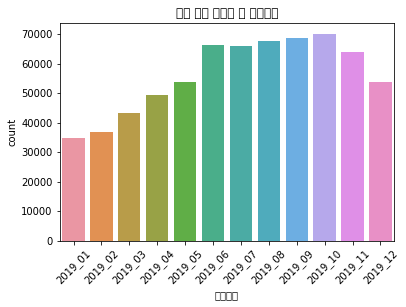

In [24]:
sns.countplot(x='대여일자', data=bike).set_title('월별 공공 자전거 총 이용건수')
plt.xticks(rotation=45)

ValueError: ignored

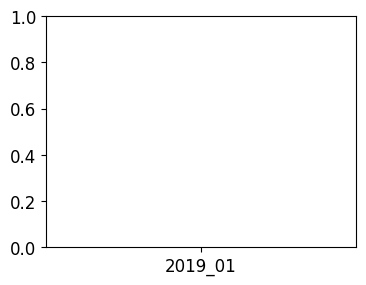

In [36]:
# matplot 에는 countplot기능이 지원되지 않음!!
# 따라서 2단계 데이터 준비단계 때, 총 이용 건수를 미리 계산해놔야한다.
# 참고 사이트 : https://colab.research.google.com/drive/1svcnbAtO2HwtFPmkKbg9hxrvChVzTAjn#scrollTo=r8Ughx7GXZTU&line=3&uniqifier=1

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = bike19['대여일자']
y = bike19['이용건수'].sum() #y = bike19['이용건수'].sum()


# 3 그래프 그리기
plt.plot(x, y, 'bo') # 'bo' = blue, circle 
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()
